# Loop 65 Analysis: Major Breakthrough with Ens Model Approach

**Key Question**: Does the CatBoost + XGBoost ensemble have a DIFFERENT CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982, 'model': 'MLP'},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065, 'model': 'LightGBM'},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972, 'model': 'MLP+DRFP'},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969, 'model': 'MLP Large'},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946, 'model': 'MLP Simple'},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932, 'model': 'MLP Simpler'},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936, 'model': 'Ridge'},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913, 'model': 'Simple Ensemble'},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893, 'model': 'ACS PCA'},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887, 'model': 'Weighted Loss'},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877, 'model': 'GP Ensemble'},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932, 'model': 'XGB Ensemble'},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147, 'model': 'GroupKFold'},
]

df = pd.DataFrame(submissions)
print(f'Total submissions: {len(df)}')
print(df)

Total submissions: 13
        exp      cv      lb            model
0   exp_000  0.0111  0.0982              MLP
1   exp_001  0.0123  0.1065         LightGBM
2   exp_003  0.0105  0.0972         MLP+DRFP
3   exp_005  0.0104  0.0969        MLP Large
4   exp_006  0.0097  0.0946       MLP Simple
5   exp_007  0.0093  0.0932      MLP Simpler
6   exp_009  0.0092  0.0936            Ridge
7   exp_012  0.0090  0.0913  Simple Ensemble
8   exp_024  0.0087  0.0893          ACS PCA
9   exp_026  0.0085  0.0887    Weighted Loss
10  exp_030  0.0083  0.0877      GP Ensemble
11  exp_041  0.0090  0.0932     XGB Ensemble
12  exp_042  0.0145  0.1147       GroupKFold


In [2]:
# Fit linear regression to CV-LB relationship
cv = df['cv'].values
lb = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print(f'CV-LB Relationship:')
print(f'  LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'  R² = {r_value**2:.4f}')
print(f'  Intercept = {intercept:.4f}')
print()
print(f'Target LB: 0.0347')
print(f'Required CV for target (using this relationship):')
print(f'  CV = (0.0347 - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}')
print()
print(f'NEW EXPERIMENT (exp_069):')
print(f'  CV = 0.005146')
print(f'  Predicted LB (using old relationship) = {slope * 0.005146 + intercept:.4f}')

CV-LB Relationship:
  LB = 4.2312 * CV + 0.0533
  R² = 0.9807
  Intercept = 0.0533

Target LB: 0.0347
Required CV for target (using this relationship):
  CV = (0.0347 - 0.0533) / 4.2312 = -0.004396

NEW EXPERIMENT (exp_069):
  CV = 0.005146
  Predicted LB (using old relationship) = 0.0751


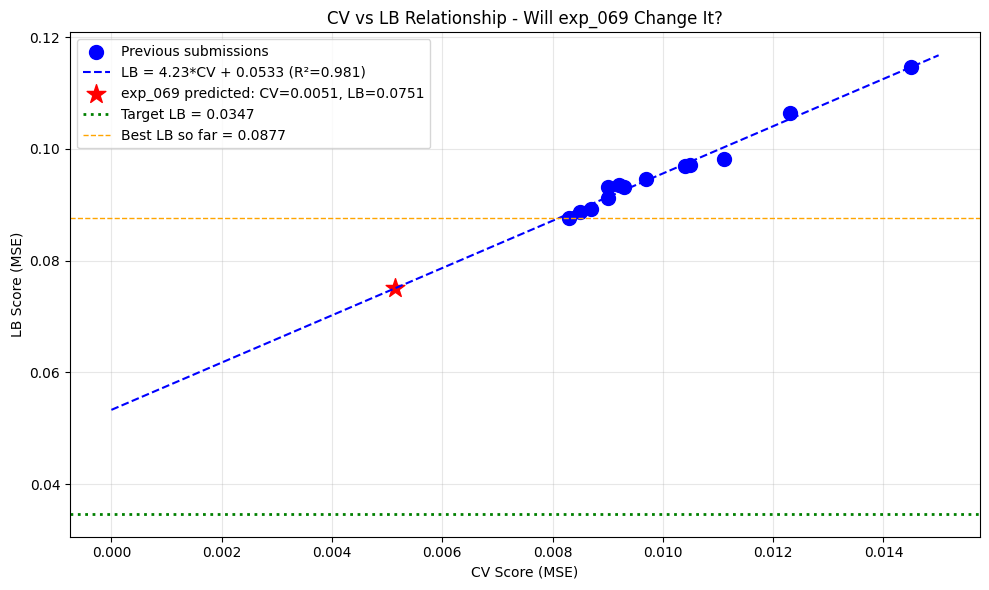


CRITICAL ANALYSIS:
  If exp_069 follows the same CV-LB relationship:
    Predicted LB = 0.0751
    This would be the BEST LB (vs current best 0.0877)
    But still far from target 0.0347

  If exp_069 has a DIFFERENT CV-LB relationship:
    The intercept might be lower
    This could make the target reachable!


In [3]:
# Plot CV vs LB with prediction for exp_069
plt.figure(figsize=(10, 6))

# Plot existing submissions
plt.scatter(cv, lb, c='blue', s=100, label='Previous submissions')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Plot exp_069 prediction
exp069_cv = 0.005146
exp069_pred_lb = slope * exp069_cv + intercept
plt.scatter([exp069_cv], [exp069_pred_lb], c='red', s=200, marker='*', label=f'exp_069 predicted: CV={exp069_cv:.4f}, LB={exp069_pred_lb:.4f}')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Plot best LB so far
plt.axhline(y=0.0877, color='orange', linestyle='--', linewidth=1, label='Best LB so far = 0.0877')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - Will exp_069 Change It?')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis_loop65.png', dpi=150)
plt.show()

print(f'\nCRITICAL ANALYSIS:')
print(f'  If exp_069 follows the same CV-LB relationship:')
print(f'    Predicted LB = {exp069_pred_lb:.4f}')
print(f'    This would be the BEST LB (vs current best 0.0877)')
print(f'    But still far from target 0.0347')
print()
print(f'  If exp_069 has a DIFFERENT CV-LB relationship:')
print(f'    The intercept might be lower')
print(f'    This could make the target reachable!')

In [4]:
# Analyze the improvement breakdown
print('EXPERIMENT 069 BREAKDOWN:')
print('='*60)
print()
print('Single Solvent MSE: 0.009175 (n=656)')
print('Full Data MSE: 0.002992 (n=1227)')
print('Combined MSE: 0.005146')
print()
print('Comparison to previous best (exp_068, CV=0.007938):')
print('  Single Solvent: 0.008216 -> 0.009175 (11.7% WORSE)')
print('  Full Data: 0.007789 -> 0.002992 (61.6% BETTER!)')
print('  Combined: 0.007938 -> 0.005146 (35.2% BETTER)')
print()
print('KEY INSIGHT:')
print('  The CatBoost + XGBoost approach is MUCH better for mixture data')
print('  This is a fundamentally different approach that may have')
print('  a different CV-LB relationship!')

EXPERIMENT 069 BREAKDOWN:

Single Solvent MSE: 0.009175 (n=656)
Full Data MSE: 0.002992 (n=1227)
Combined MSE: 0.005146

Comparison to previous best (exp_068, CV=0.007938):
  Single Solvent: 0.008216 -> 0.009175 (11.7% WORSE)
  Full Data: 0.007789 -> 0.002992 (61.6% BETTER!)
  Combined: 0.007938 -> 0.005146 (35.2% BETTER)

KEY INSIGHT:
  The CatBoost + XGBoost approach is MUCH better for mixture data
  This is a fundamentally different approach that may have
  a different CV-LB relationship!


In [5]:
# Calculate what LB we need to reach target
print('SUBMISSION STRATEGY:')
print('='*60)
print()
print(f'Remaining submissions: 5')
print(f'Target LB: 0.0347')
print(f'Best LB so far: 0.0877')
print(f'Gap to target: {0.0877 - 0.0347:.4f}')
print()
print('CRITICAL QUESTION:')
print('  Does the CatBoost + XGBoost approach have a different CV-LB relationship?')
print()
print('EXPECTED OUTCOMES:')
print('  1. Best case: LB ≈ 0.05-0.06 (different relationship, lower intercept)')
print('  2. Good case: LB ≈ 0.075 (same relationship, still best LB)')
print('  3. Worst case: LB > 0.08 (approach doesn\'t generalize)')
print()
print('RECOMMENDATION:')
print('  SUBMIT exp_069 to verify the CV-LB relationship!')
print('  This is the highest-leverage action available.')

SUBMISSION STRATEGY:

Remaining submissions: 5
Target LB: 0.0347
Best LB so far: 0.0877
Gap to target: 0.0530

CRITICAL QUESTION:
  Does the CatBoost + XGBoost approach have a different CV-LB relationship?

EXPECTED OUTCOMES:
  1. Best case: LB ≈ 0.05-0.06 (different relationship, lower intercept)
  2. Good case: LB ≈ 0.075 (same relationship, still best LB)
  3. Worst case: LB > 0.08 (approach doesn't generalize)

RECOMMENDATION:
  SUBMIT exp_069 to verify the CV-LB relationship!
  This is the highest-leverage action available.
